<a href="https://colab.research.google.com/github/TienNguyen0712/credit-card-fraud-detection/blob/main/src/notebooks/01_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📓 **Exploratory Data Analysis (Khám phá dữ liệu)**
> Mục tiêu: Hiểu dữ liệu: bao gồm thống kê mô tả, phân bố các đặc trưng, dữ liệu thiếu, kiểu dữ liệu, tương quan, v...v


## 📁 **Dataset overview (Tổng qua bộ dữ liệu)**

- **Nguồn gốc:** Bộ dữ liệu được thu thập trong tháng 11/2013 gồm các giao dịch trong thẻ tín dụng thuộc khu vự Châu Âu

- **Đặc điểm:** Bộ dữ liệu mô tả các giao dịch trong vòng 2 ngày. Bộ dữ liệu này gồm khoảng hơn 160k giao dịch và 31 đặc trưng

Để bảo toàn tính bảo mật mà tên của các giao dịch đã bị xóa. Tên các đặc trưng còn sử dụng trong bài chỉ là tên các biến sau khi đã thực hiện giảm chiều (PCA)

- **Đặc trưng:**

  - `V1 - V28:` biến đặc trưng đã mã hóa của giao dịch sau khi đã giảm chiểu
  - `Time:` Thời gian giao dịch tính bằng giây
  - `Amount:` Chi phí cho mỗi giao dịch
  - `Class` **(Target)** Nhãn của các giao dịch


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = 'serif'
plt.rcParams["figure.facecolor"] = "#fafafa"
plt.rcParams["axes.facecolor"] = "#fafafa"

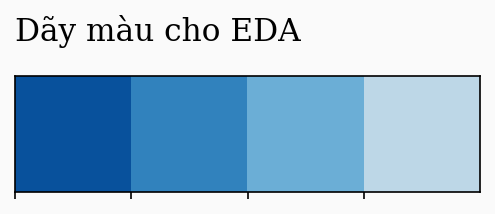

In [21]:
# Palette
palette = ["#08519c", "#3182bd", "#6baed6", "#bdd7e7"]
sns.palplot(palette)

plt.title("Dãy màu cho EDA",loc='left',fontsize=15,y=1.2)
plt.show()


In [22]:
df = pd.read_csv('creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [25]:
from os import dup
dup_sum = df.duplicated().sum()
df.drop_duplicates(inplace=True) # Xóa dữ liệu bị trùng

print(f"{dup_sum} dữ liệu trùng đã bị loại bỏ")

1081 dữ liệu trùng đã bị loại bỏ


In [26]:
# Features Engineering

# Chuyển đổi giây thành giờ trong ngày
df['Hour'] = (df['Time'] // 3600) % 24

# Chuyển thành log
df['Amount_log'] = np.log1p(df['Amount'])

class_1 = df[df['Class'] == 1]
class_0 = df[df['Class'] == 0]

## 📊 **Class Distribution (Phân bố của biến mục tiêu)**



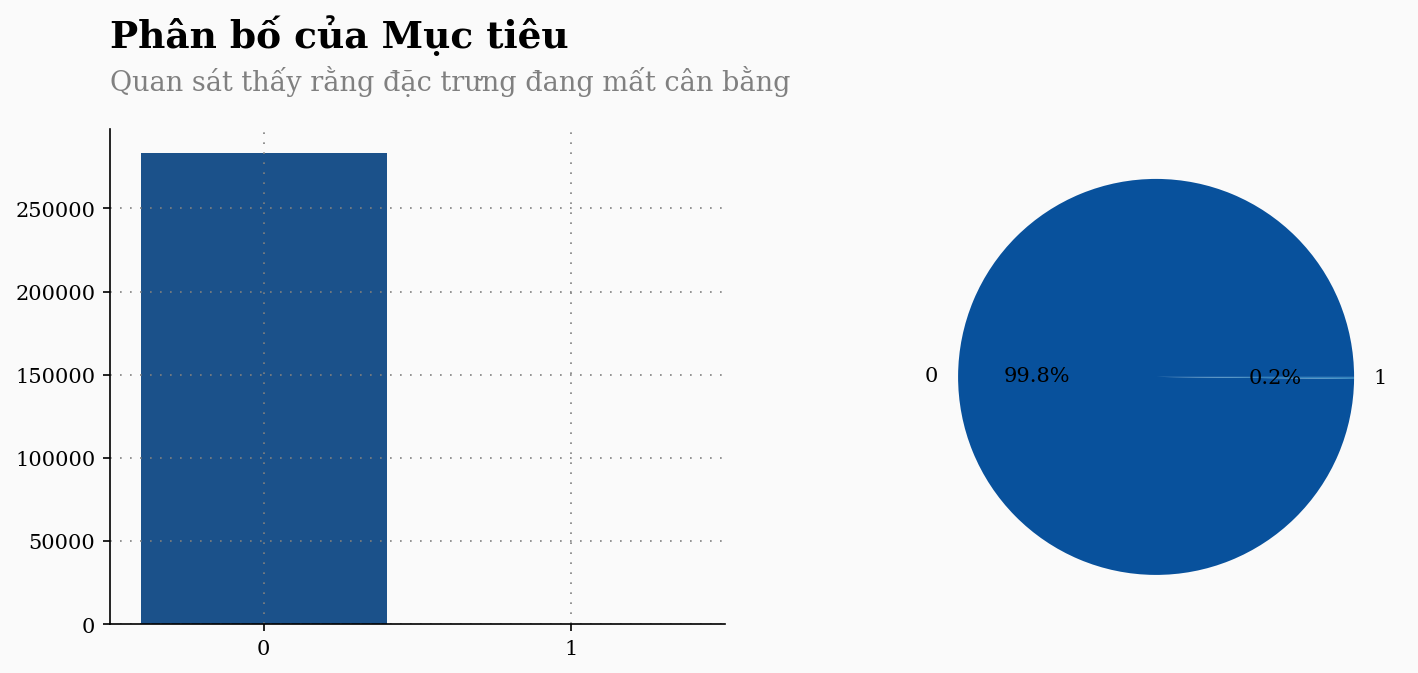

In [27]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.2, hspace=0.25)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)


sns.countplot(ax=ax0, x=df["Class"], palette=palette)

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()
ax0.set_ylim([0,Yend])
ax0.text(Xstart,Yend+(Yend*0.15), "Phân bố của Mục tiêu", fontsize=18, ha="left", va="bottom", weight="bold")
ax0.text(Xstart,Yend+(Yend*0.13), "Quan sát thấy rằng đặc trưng đang mất cân bằng", color="gray",
fontsize=13, ha="left", va="top")


size = df["Class"].value_counts() / df.shape[0] * 100 # Tính tỷ lệ trong churn

plt.pie(size, labels=size.index, colors=palette, autopct='%1.1f%%')

ax0.set_xlabel("")
ax0.set_ylabel("")

ax0.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

plt.show()

**Nhận xét**

- Bộ dữ liệu bị mất cân bằng khá nặng:
  - Lớp gian lận: Chiếm **0.2%**
  - Lớp không gian lận: Chiếm **99.8%**

**Insight**

- Dữ liệu cực kỳ mất cân bằng, đòi hỏi kỹ thuật Resampling hoặc Cost-sensitve learning

## 📈 **Feature Distribution (Phân bố của các đặc trưng)**

In [28]:
df_time_amount = df[['Time', 'Amount']]
df_time_amount.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.0,54204.75,84692.5,139298.00,172792.00
Amount,283726.0,88.472687,250.399437,0.0,5.60,22.0,77.51,25691.16


**Nhận xét**

- Thời gian giao dịch trong khoảng từ 0 đến hơn 18000 giây trung bình là khoảng 94000 giây
- Chi phí giao dịch cao nhất là 25891 và thấp nhất là 0

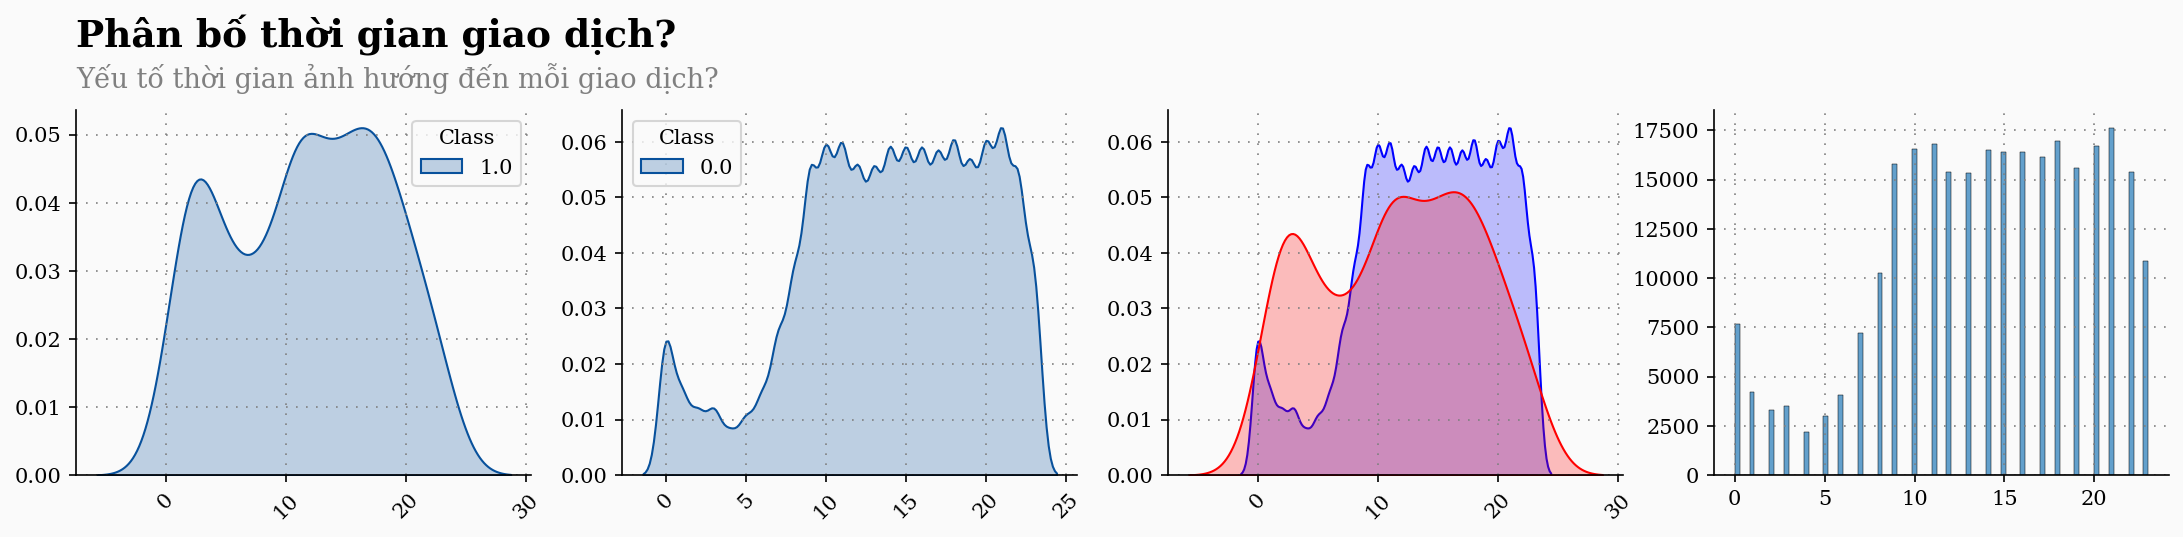

In [29]:
# Time
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(4, 4)
gs.update(wspace=0.2, hspace=0.25)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[0, 3])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)


sns.kdeplot(ax=ax0, x=df['Hour'], hue=class_1['Class'], palette=['#08519c', '#6baed6'], shade=True)
sns.kdeplot(ax=ax1, x=df['Hour'], hue=class_0['Class'], palette=['#08519c', '#6baed6'], shade=True)
sns.kdeplot(ax=ax2, x=class_0['Hour'], label='Hợp lệ (Genuine)', shade=True, color='blue')
sns.kdeplot(ax=ax2, x=class_1['Hour'], label='Gian lận (Fraud)', shade=True, color='red')
sns.histplot(ax=ax3, x=df['Hour'], color='#3182bd')

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.set_ylim([0,Yend])
ax0.text(Xstart,Yend+(Yend*0.15), "Phân bố thời gian giao dịch?", fontsize=18, ha="left", va="bottom", weight="bold")
ax0.text(Xstart,Yend+(Yend*0.13), "Yếu tố thời gian ảnh hướng đến mỗi giao dịch?", color="gray",
fontsize=13, ha="left", va="top")


ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


ax0.set_xlabel("")
ax0.set_ylabel("")
ax1.set_xlabel("")
ax1.set_ylabel("")
ax2.set_xlabel("")
ax2.set_ylabel("")
ax3.set_xlabel("")
ax3.set_ylabel("")


ax0.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax3.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax3.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

plt.show()

In [30]:
class_1_time = class_1['Hour']
class_0_time = class_0['Hour']

print(f"Class_1:\n {class_1_time.describe().T},\n\n\n\nClass_0:\n {class_0_time.describe().T}")

Class_1:
 count    473.000000
mean      11.655391
std        6.544636
min        0.000000
25%        6.000000
50%       12.000000
75%       17.000000
max       23.000000
Name: Hour, dtype: float64,



Class_0:
 count    283253.000000
mean         14.049638
std           5.832753
min           0.000000
25%          10.000000
50%          15.000000
75%          19.000000
max          23.000000
Name: Hour, dtype: float64


Sau khi đổi cột `Time` sang `Hour` tính theo giờ trong một ngày ta có những nhận xét sau

**Nhận xét**

- **Class_1 (Lớp gian lận )**: Thường tập trung nhiều trong khoảng thời gian từ 0 đến 10 giờ đầu và gia tăng mạng trong khung giờ từ 10 đến 20 giờ đặc biệt đỉnh cao nhất là vào 20 giờ thì giao dịch sẽ giảm dần sau đó

- **Class_0 (Lớp không gian lận )**: Thường ta có thể thấy diễn ra nhiều giờ khác nhau nhưng có một chút khác biệt từ khoảng giữa 0 đến 5 giờ giao dịch dường như thấp hẳn và chỉ tăng bắt đầu từ mốc sau 5 giờ trở đi

- **Trung bình:** giữa lớp gian lận ít hơn lớp không gian lận

**Insight**

Các giao dịch gian lận thường băt đầu từ các khung giờ rất sớm trong khoảng từ 0 đến 6 7 giờ đầu (giờ ít đề phòng), các giao dịch không gian lận thì thường giảm mạnh vào những khung giờ từ 0 đến 5 giờ (giờ đi ngủ). Đó là sự khác nhau của 2 loại giao dịch

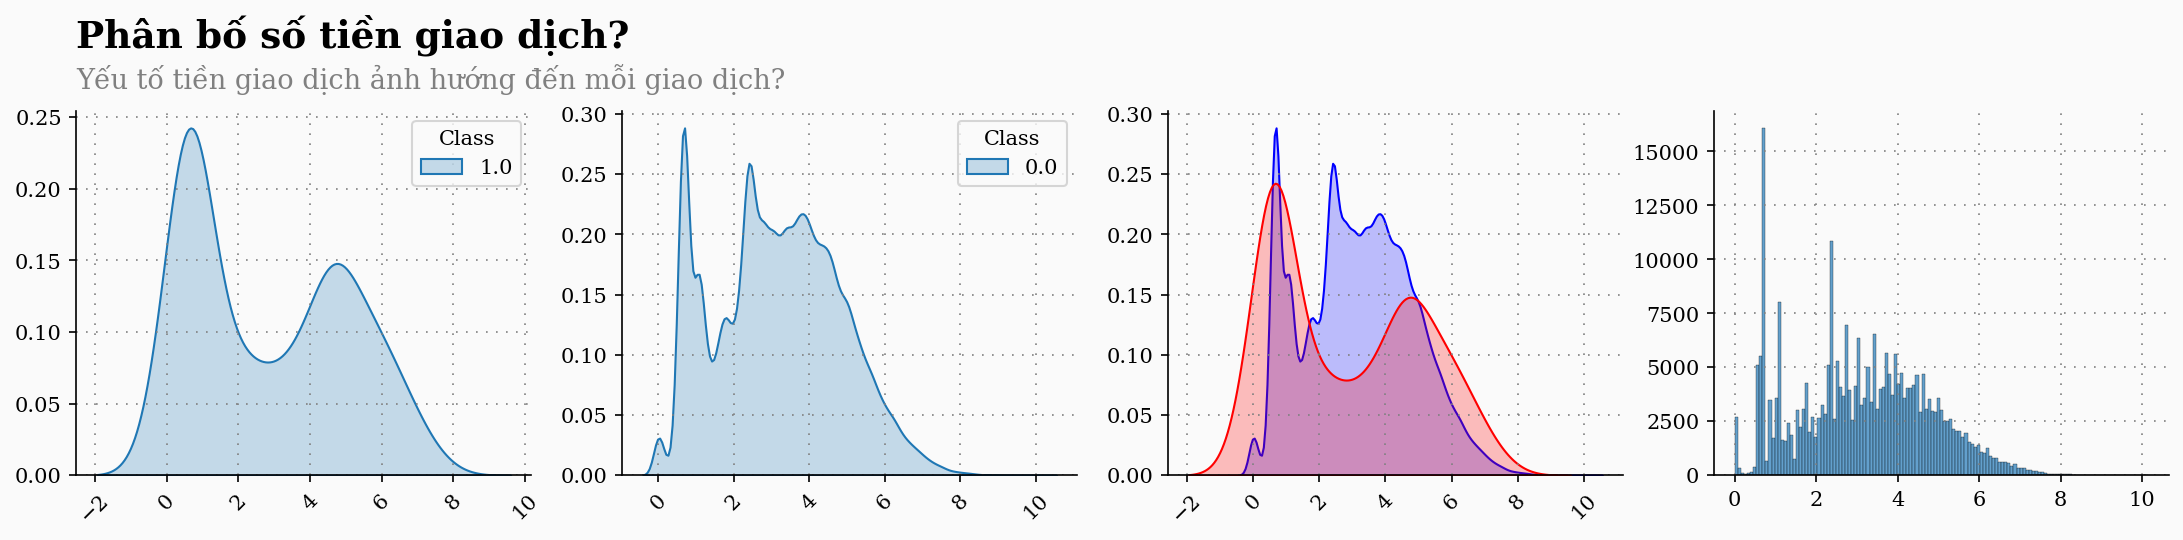

In [31]:
# Amount
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(4, 4)
gs.update(wspace=0.2, hspace=0.25)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[0, 3])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)


sns.kdeplot(ax=ax0, x=df['Amount_log'], hue=class_1['Class'], color=['#6baed6'], shade=True)
sns.kdeplot(ax=ax1, x=df['Amount_log'], hue=class_0['Class'], color=['#08519c'], shade=True)
sns.kdeplot(ax=ax2, x=class_0['Amount_log'], label='Hợp lệ (Genuine)', fill=True, color='blue')
sns.kdeplot(ax=ax2, x=class_1['Amount_log'], label='Gian lận (Fraud)', fill=True, color='red')
sns.histplot(ax=ax3, x=df['Amount_log'], color='#3182bd')

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.set_ylim([0,Yend])
ax0.text(Xstart,Yend+(Yend*0.15), "Phân bố số tiền giao dịch?", fontsize=18, ha="left", va="bottom", weight="bold")
ax0.text(Xstart,Yend+(Yend*0.13), "Yếu tố tiền giao dịch ảnh hướng đến mỗi giao dịch?", color="gray",
fontsize=13, ha="left", va="top")


ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


ax0.set_xlabel("")
ax0.set_ylabel("")
ax1.set_xlabel("")
ax1.set_ylabel("")
ax2.set_xlabel("")
ax2.set_ylabel("")
ax3.set_xlabel("")
ax3.set_ylabel("")

ax0.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax3.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax3.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

plt.show()

In [32]:
class_1_amount = class_1['Amount']
class_0_amount = class_0['Amount']

print(f"Class_1:\n {class_1_amount.describe().T},\n\n\n\nClass_0:\n {class_0_amount.describe().T}")

Class_1:
 count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64,



Class_0:
 count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64


Do cột `Amount` có độ lệch tương đối lớn nên ta chuyển đổi giá trị Amount về Log để dễ dàng phân tích

Theo công thức:

$$ LogAmount = log1p(Amount) = ln(1 + Amount)$$

**Nhận xét**

- **Class_1 (Lớp gian lận )**: Thường giao động nhiều trong khoảng số tiền thấp cũng như các giá trị trung bình đồ thị có 2 đỉnh, thường tập trung nhiều vào các giáo dịch rất rõ rệt và sẽ dễ đoán hơn không gian lận

- **Class_0 (Lớp không gian lận )**: Phân bố của các giao dịch là bình thường, do có nhiều đỉnh nhỏ cho thấy sự đa dạng trong hành vi của người dùng thật

- **Nhận diện:** Tại các điểm mà đường màu đỏ cao hơn đường màu xanh xác suất để một giao dịch là gian lận sẽ cao hơn

**Insight**

Các giao dịch gian lận thường có phần dễ đoán hơn và tập trung nhiều vào 1 hoặc 2 khoảng giá trị trong khi các giao dịch không gian lận cho thấy được sự đa dạng dựa trên hành vi của người dùng. Biểu đồ đường màu đỏ đạt cao sẽ có khả năng xảy ra các giao dịch gian lận nhiều hơn

## 🔀 **Correlation Matrix (Ma trận tương quan)**



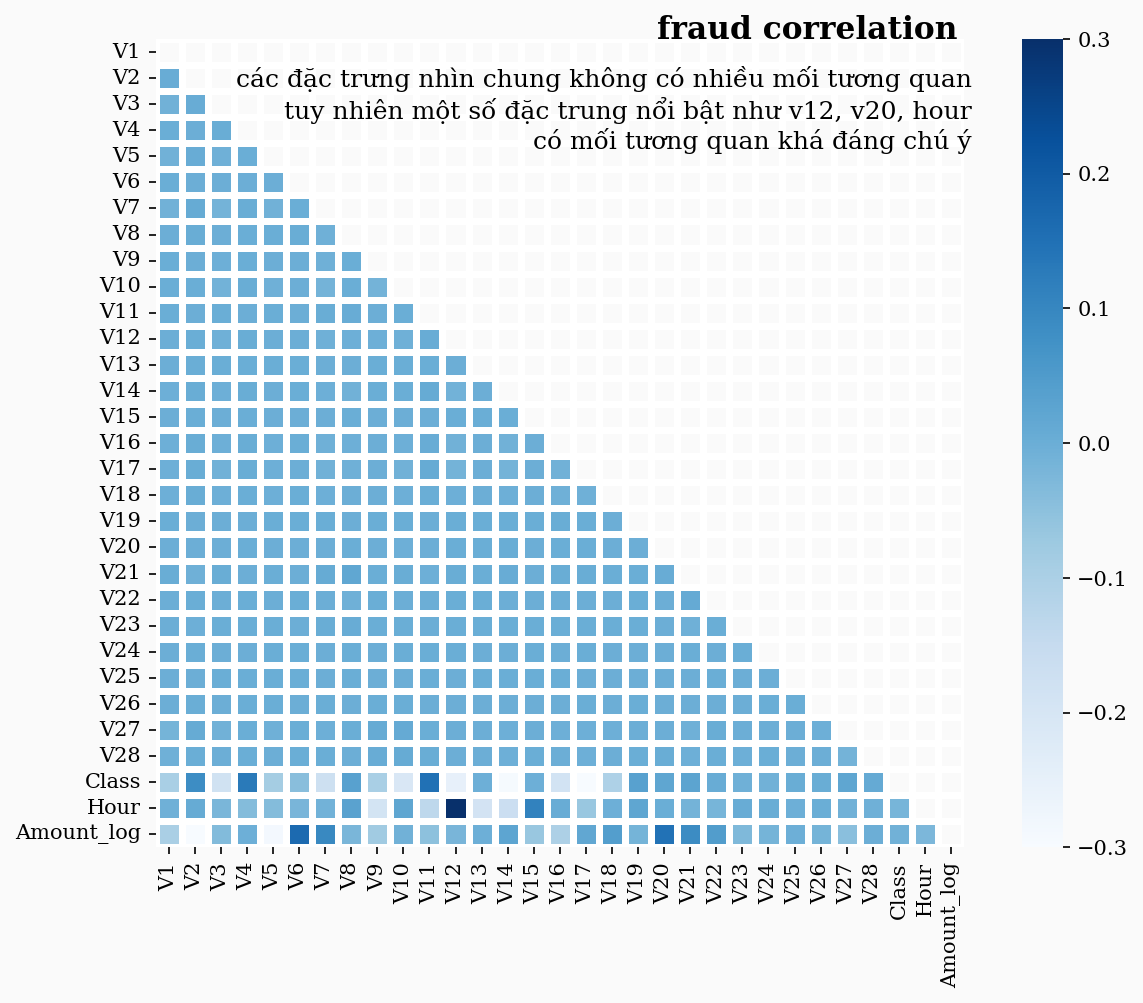

In [33]:
df_corr = df.drop(columns=['Time', 'Amount'])


corr_matrix = df_corr.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 7))
fig.text(.54,.88,'fraud correlation', fontweight='bold',fontsize=15)
fig.text(.75,.75,
            '''
            các đặc trưng nhìn chung không có nhiều mối tương quan
            tuy nhiên một số đặc trung nổi bật như v12, v20, hour
            có mối tương quan khá đáng chú ý
             ''', fontfamily='serif',fontsize=12,ha='right')
pl = sns.heatmap(corr_matrix, mask=mask, cmap='Blues', vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)

plt.show()

**Nhận xét**

Các đặc trưng (từ V1 -> V28) đều có mối quan hệ độc lập với nhau (Hệ số tương quan là 0)

Tuy nhiên: Các mối tương quan khác
- **Đối với biến mục tiêu (gian lận)**
  - **Hệ só tương quan dương mạnh:** các ô có màu xanh đậm tại các giao điểm với `V4` và `V11`. Điều này có nghĩa là khi giá tị của V4 và V11 tăng lêm khả năng đó là giao dịch gian lận là rất cao
  - **Hệ só tương quan âm mạnh:** Các ô màu xanh nhạt hoặc trắng (mức -0.1 đếm -0.2) xuất hiện tại `V12`, `V14`, `V17`. Điều này cho thấy các biến này có xu hướng nghịch biến với khả năng gian lận
- **Đối với đặc trưng thời gian giao dịch**
  - **Tương quan âm nổi bật:** Ô màu đen/xanh đậm nhất trên dòng `Hour` nằm ở cột `V3`. Điều này cho thấy một mối tương quan âm khá rõ rệt (khi số giờ tăng lên, giá trị V3 có xu hướng giảm mạnh hoặc ngược lại).
  - **Tương quan với `Class:`** Ô giao giữa `Hour` và `Class` có màu xanh đậm nhạt, cho thấy có một mối tương quan âm nhẹ. Điều này có thể hiểu là các vụ gian lận có xu hướng xảy ra nhiều hơn vào các khung giờ sớm (giá trị Hour thấp).
- **Đối với đặc trưng số tiền giao dịch**
  - **Tương quan dương:** `Amount_log` có tương quan dương rõ rệt với `V7` và `V20` (các ô màu xanh đậm hơn). Những đặc trưng này tỉ lệ thuận với giá trị giao dịch.
  - **Tương quan âm:** Có tương quan âm nhẹ với `V1, V2 và V5`.
  - **Tương quan với `Class`:** Ô giao giữa `Amount_log` và `Class` có màu rất nhạt (gần như trắng), cho thấy số tiền giao dịch không có mối tương quan trực tiếp quá mạnh với việc xác định một hành vi là gian lận hay không trên tập dữ liệu này.

**Insight**

- `V4` và `V11` là những "dấu hiệu đỏ" quan trọng nhất để nhận diện gian lận (tương quan dương).
- `V12` và `V14` là những biến chỉ báo nghịch quan trọng (tương quan âm với gian lận).
- `Thời gian và Số tiền` không phải là những biến độc lập mạnh nhất để dự báo gian lận, nhưng chúng có mối quan hệ phức tạp với các biến ẩn (V1-V28).


## 💬 **Outlier check (Kiểm tra ngoại lai)**



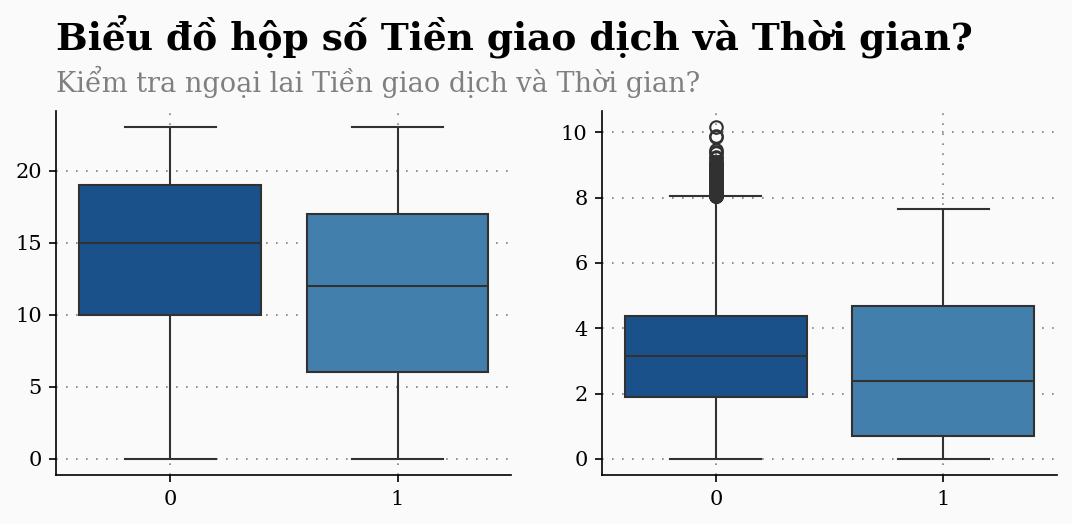

In [35]:
# Kiểm tra giữa Thời gian và Tiền giao dịch

fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(4, 4)
gs.update(wspace=0.2, hspace=0.25)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

sns.boxplot(ax=ax0, x='Class', y='Hour', data=df, palette=palette)
sns.boxplot(ax=ax1, x='Class', y='Amount_log', data=df, palette=palette)

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()
ax0.text(Xstart,Yend+(Yend*0.15), "Biểu đồ hộp số Tiền giao dịch và Thời gian?", fontsize=18, ha="left", va="bottom", weight="bold")
ax0.text(Xstart,Yend+(Yend*0.13), "Kiểm tra ngoại lai Tiền giao dịch và Thời gian?", color="gray",
fontsize=13, ha="left", va="top")

ax0.set_xlabel("")
ax0.set_ylabel("")
ax1.set_xlabel("")
ax1.set_ylabel("")

ax0.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

plt.show()